In [1]:
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import Neural_Net

In [132]:
Data = pd.read_csv("./Data/Data.csv")
Data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
Labels = Data["label"]
Images = Data.drop(labels = ["label"],axis = 1) 
Labels.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [60]:
Images.isnull().values.any() #data set has no null values

False

In [148]:
Images_stand = preprocessing.scale(Images) #Standardize the test set

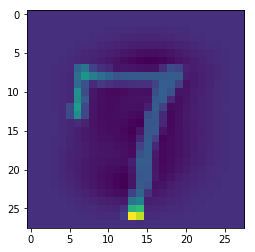

In [152]:
plt.imshow(Images_stand[6].reshape(28, 28)) #Observing an image

In [81]:
rand_seed = 3
#Split into training (90%) and validation set (10%)
train_Images, test_Images, train_Labels, test_Labels = train_test_split(Images_stand,Labels,
                                                                        random_state=rand_seed,test_size = 0.1)

In [107]:
train_Images.shape

(37800, 784)

In [ ]:
Arc_Neural_Net = [train_Images.T.shape[0],30,100,60,30,Labels.nunique()]

Imag_Neural_Net = Neural_Net.NeuralNet(Arc_Neural_Net)
N_train = 100

accuracy,error = Imag_Neural_Net.train_network_SGD(train_Images.T[:,0:N_train],train_Labels[0:N_train].values,
                                                   minibatch_size=10,eta=5,iteration=500)

One can train the network for longer and get better accuracy but training 100 shows that the ANN backpropagation works. 

In [126]:
accuracy_test,error_test = Imag_Neural_Net.eval_data(test_Images.T,test_Labels.values)
accuracy_test

0.19738095238095238

One can train the network for longer, adjust the parameters, and include more images to get better accuracy on the test set. Could also be good to include regularization in the objective function. 

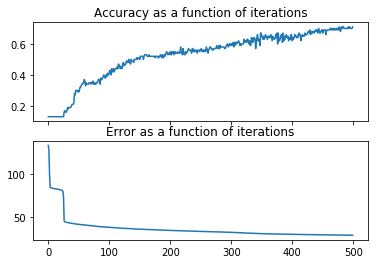

In [130]:
fig,ax= plt.subplots(2, sharex=True)
ax[0].plot(accuracy)
ax[0].set_title('Accuracy as a function of iterations')
ax[1].plot(error)
ax[1].set_title('Error as a function of iterations');